In [42]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing


In [43]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [44]:
# Load the dataset using image_dataset_from_directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "beansLeaf",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1520 files belonging to 3 classes.


In [45]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255),  # Rescale pixel values to [0, 1]
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    # Add more augmentation techniques as needed
])


In [46]:
# Augment and expand the dataset
augmented_dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [47]:
# Combine the original dataset with the augmented dataset
combined_dataset = dataset.concatenate(augmented_dataset)

In [48]:
# Shuffle and batch the combined dataset
combined_dataset = combined_dataset.shuffle(1000).batch(32)

In [49]:
class_names = dataset.class_names

# Split the dataset into training, validation, and test sets
train_ds = augmented_dataset.take(int(0.8 * len(dataset)))
val_ds = augmented_dataset.skip(int(0.8 * len(dataset))).take(int(0.1 * len(dataset)))
test_ds = augmented_dataset.skip(int(0.9 * len(dataset)))

In [50]:
# Preprocess the datasets
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [51]:
train_ds = train_ds.map(lambda x, y: (resize_and_rescale(x), y))
val_ds = val_ds.map(lambda x, y: (resize_and_rescale(x), y))
test_ds = test_ds.map(lambda x, y: (resize_and_rescale(x), y))


In [52]:

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
val_ds = val_ds.map(lambda x, y: (data_augmentation(x, training=False), y))
test_ds = test_ds.map(lambda x, y: (data_augmentation(x, training=False), y))

In [53]:
# Preprocess the datasets
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))


In [54]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [55]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [56]:
# Model Architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 60, 60, 64)         

In [57]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [58]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/30
38/38 [==============================] - 259s 5s/step - loss: 1.0806 - accuracy: 0.4252 - val_loss: 1.0799 - val_accuracy: 0.4453
Epoch 2/30
38/38 [==============================] - 175s 4s/step - loss: 1.0803 - accuracy: 0.4334 - val_loss: 1.0813 - val_accuracy: 0.4453
Epoch 3/30
38/38 [==============================] - 167s 4s/step - loss: 1.0783 - accuracy: 0.4334 - val_loss: 1.0803 - val_accuracy: 0.4453
Epoch 4/30
38/38 [==============================] - 156s 4s/step - loss: 1.0815 - accuracy: 0.4334 - val_loss: 1.0846 - val_accuracy: 0.4453
Epoch 5/30
38/38 [==============================] - 220s 6s/step - loss: 1.0805 - accuracy: 0.4334 - val_loss: 1.0805 - val_accuracy: 0.4453
Epoch 6/30
38/38 [==============================] - 142s 4s/step - loss: 1.0764 - accuracy: 0.4334 - val_loss: 1.0782 - val_accuracy: 0.4453
Epoch 7/30
38/38 [==============================] - 158s 4s/step - loss: 1.0758 - accuracy: 0.4334 - val_loss: 1.0768 - val_accuracy: 0.4453
Epoch 8/30
38

KeyboardInterrupt: 

In [ ]:
# Perform evaluation on the test dataset
scores = model.evaluate(test_ds)

5/5 [==============================] - 45s 936ms/step - loss: 1.0934 - accuracy: 0.4028


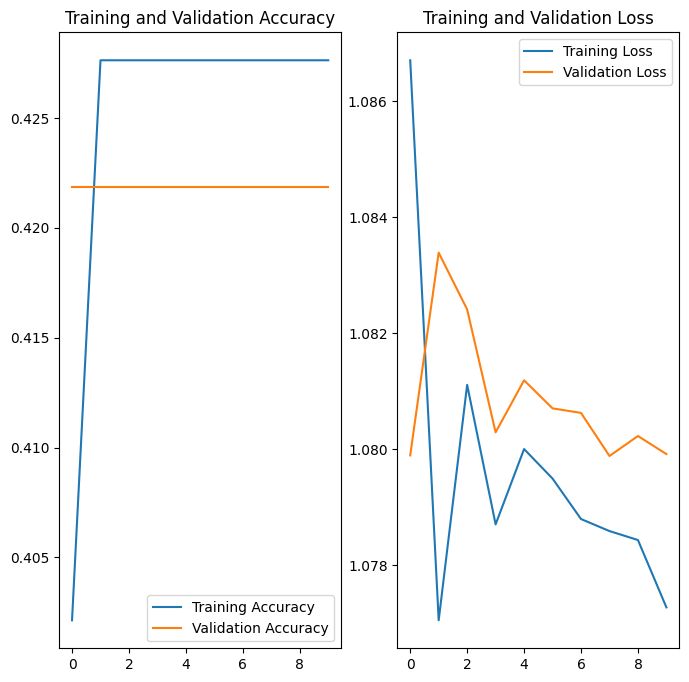

In [ ]:
# Plot the training and validation curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 2s 2s/step


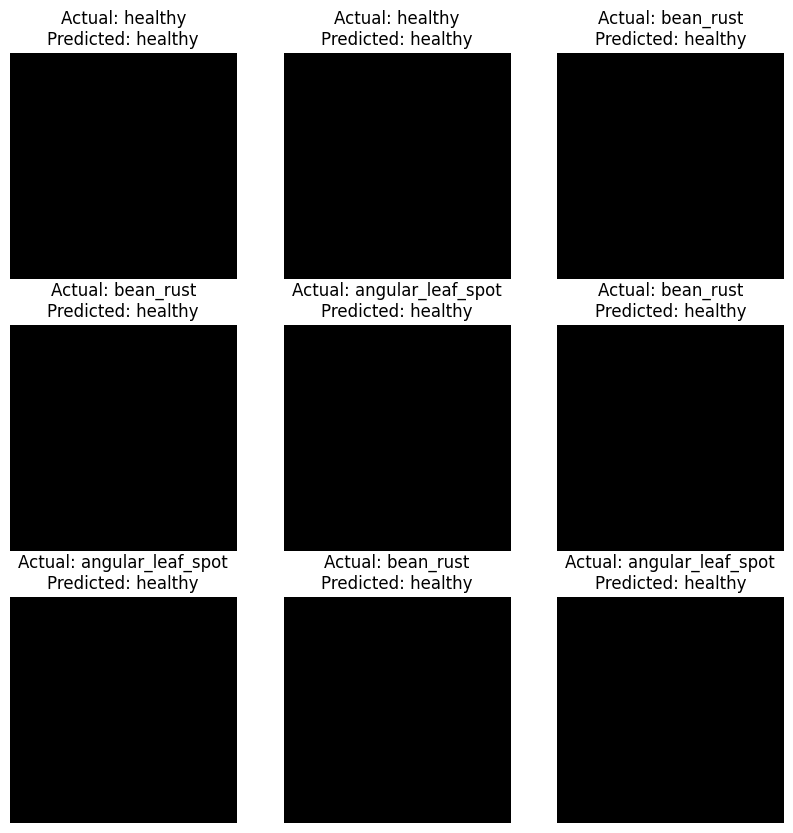

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        # plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("./models") + [0]])+1
model.save(f"./models/{model_version}")

In [ ]:
model.save("../beanNew.h5")